In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#Importing data
df = pd.read_excel('Sample - Superstore.xls')
#Printing head
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
df.shape

(9994, 21)

In [3]:
df.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [2]:
##Subsetting the Furniture category using loc
##Single Dimensional data
furniture = df.loc[df['Category'] == 'Furniture']
furniture.shape

(2121, 21)

In [3]:
#To find the number years
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [4]:
#Chronological Order
furniture=furniture[["Order Date","Sales"]]
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [5]:
furniture.head(10) ##Some days are missing which needs to be handled
##Grouping is required to club the 2 record of single day into one

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [6]:
##Clubbing the obs. of same date
##Sum() to sum the values on same date
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.shape

(889, 2)

In [7]:
furniture.head(10)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


In [8]:
furniture = furniture.set_index('Order Date') ##To set index if not previously using index_col

In [9]:
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [17]:
##Clubbing the obs. on the monthly level
##MS-->Monthly Start
y = furniture['Sales'].resample('MS').mean()
#mean --> average sale across all the day in specific month

In [18]:
print(y.shape)
y


(48,)


Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

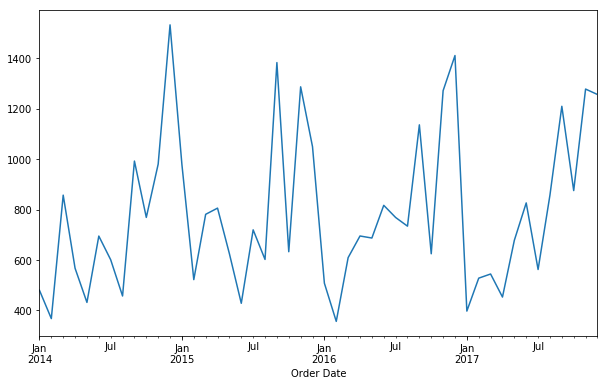

In [19]:
##Generate line graph for the continuos values above
y.plot(figsize=(10, 6)) 
plt.show()
##Trend component seen within the year and not throughout
##Also seasonality seen

In [20]:
train=y.loc[:'2016-12-01'] ##From begginning tke till december 1st of 2016 for training
train.tail()



Order Date
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
Freq: MS, Name: Sales, dtype: float64

In [21]:
#From jan 1 2017 upto end take for test data
test=y.loc['2017-01-01':]
test.tail()

Order Date
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

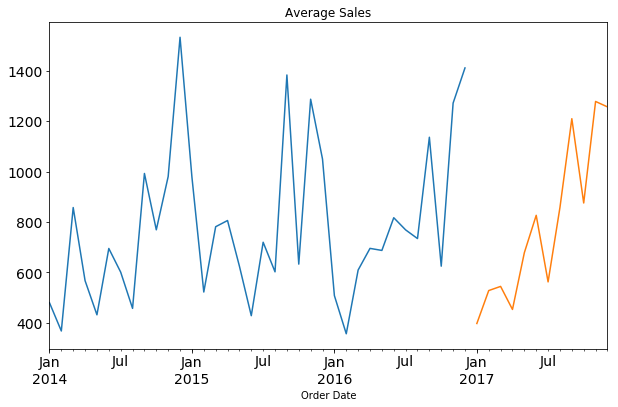

In [22]:
#Plotting data
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14) ##For 2016
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)  ##For 2017
#plt() will plot using two different color for esch values
plt.show()

C:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


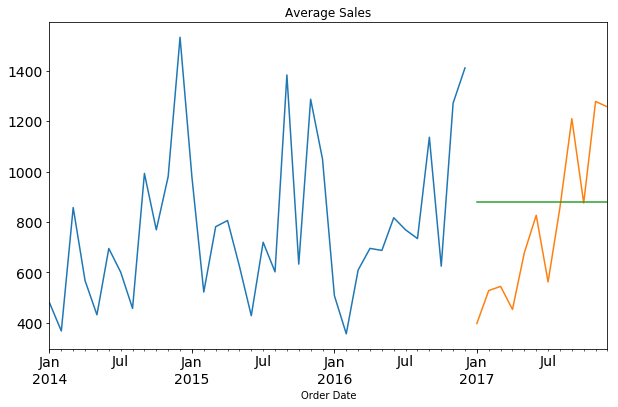

In [23]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.1) ##smoothing_level=0.1 defines the imp of older values
##0.1 means lower weigth to older values
Exp_Smooth['SES'] = fit1.forecast(len(test)) ##(len(test)-->For how much observations to forecast
##12 month after 2017

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Exp_Smooth.SES))
print(rms)

316.3327471893406


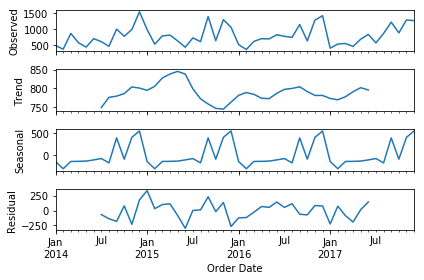

In [25]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
fig = decomposition.plot()
plt.show()
#Gives 4 component
##On basis of this which model is to be applied

C:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


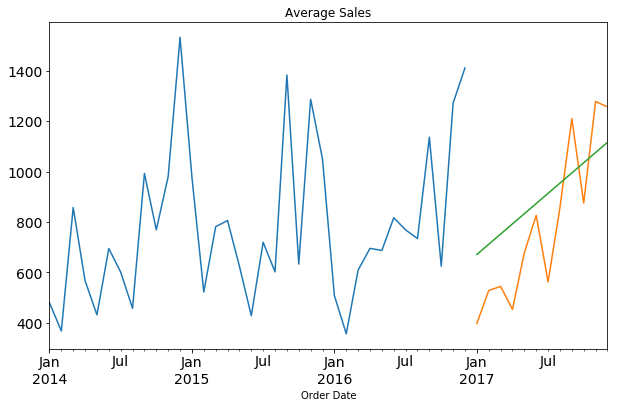

In [26]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()

fit1 = Holt(train).fit(smoothing_level = 0.05,smoothing_slope = 0.75)
#smoothing_level = 0.05-weigths
#smoothing_slope = 0.75-inclination

Holt_df['Holt_linear'] = fit1.forecast(len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Holt_df['Holt_linear']))
print(rms)

215.57931215799604


 ExponentialSmoothing

C:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


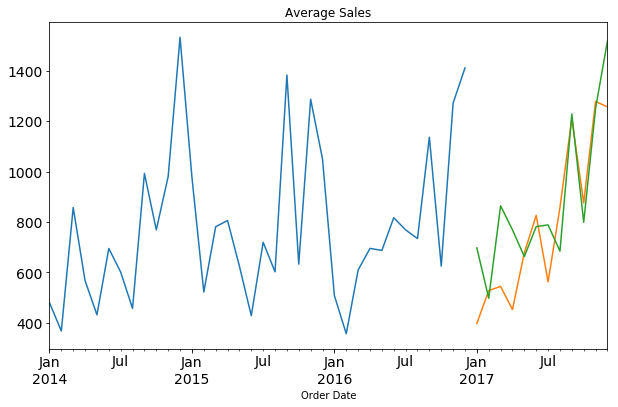

In [29]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
## seasonal_periods=12-->after how many month to repeat,
fit1 = ExponentialSmoothing(train ,seasonal_periods=12 ,
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(len(test))
##Stable Graph-->Additive model
##Exponential Graph -->Multiplicative Model



train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [31]:
##Rmse here is minimum of the rest therefore it is a good model
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Holt_Winter_df['Holt_Winter']))
print(rms)

193.9119904555351


#checking stationarity

In [32]:
#checking stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic:',result[0])
print('p-value: %f' %result[1])
##Augment Dickey Fuller Test -ADF

ADF Statistic: -5.19107018733927
p-value: 0.000009


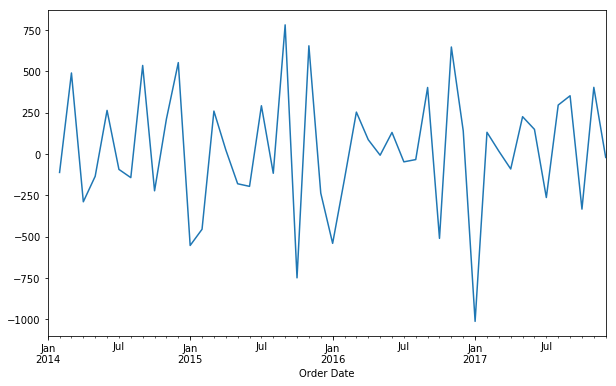

In [35]:
#diff() converts data to stationary
""""f=y.diff( periods= 1) #periods= 1-->1st order differnciation
f.plot(figsize=(10, 6))
plt.show()
""""

In [36]:
import itertools
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('SARIMAX:',pdq[7],'x', seasonal_pdq[7])


SARIMAX: (0, 2, 1) x (0, 2, 1, 12)


In [38]:
seasonal_pdq
#pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 2, 12)]

In [39]:

aic_list=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
                                seasonal_order=param_seasonal,enforce_invertibility=False,
                                            enforce_stationarity=False)
            results = mod.fit()
            print('ARIMA',param,'x',param_seasonal,' - AIC:',results.aic)
            aic_list.append(results.aic)
        except:
            continue

C:\anaconda\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA (0, 0, 0) x (0, 0, 0, 12)  - AIC: 769.0817523205916


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 0) x (0, 0, 1, 12)  - AIC: 1446.5593227130305
ARIMA (0, 0, 0) x (0, 1, 0, 12)  - AIC: 477.7170130920218
ARIMA (0, 0, 0) x (0, 2, 0, 12)  - AIC: 336.9536604857689
ARIMA (0, 0, 0) x (1, 0, 0, 12)  - AIC: 497.23144334183365


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 0) x (1, 0, 1, 12)  - AIC: 1172.208674145885
ARIMA (0, 0, 0) x (1, 1, 0, 12)  - AIC: 318.0047199116341
ARIMA (0, 0, 0) x (1, 2, 0, 12)  - AIC: 162.12029487165506
ARIMA (0, 0, 0) x (2, 0, 0, 12)  - AIC: 319.9692943450873


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 0) x (2, 0, 1, 12)  - AIC: 1010.0805104460128
ARIMA (0, 0, 0) x (2, 1, 0, 12)  - AIC: 159.5144730671919
ARIMA (0, 0, 1) x (0, 0, 0, 12)  - AIC: 720.9252270758095
ARIMA (0, 0, 1) x (0, 0, 1, 12)  - AIC: 2900.357535652858
ARIMA (0, 0, 1) x (0, 1, 0, 12)  - AIC: 466.56074298091255
ARIMA (0, 0, 1) x (0, 2, 0, 12)  - AIC: 324.41357896726953


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 1) x (1, 0, 0, 12)  - AIC: 499.574045803366
ARIMA (0, 0, 1) x (1, 0, 1, 12)  - AIC: 2513.1394870316744
ARIMA (0, 0, 1) x (1, 1, 0, 12)  - AIC: 319.98848769468657
ARIMA (0, 0, 1) x (1, 2, 0, 12)  - AIC: 163.9883442811177
ARIMA (0, 0, 1) x (2, 0, 0, 12)  - AIC: 321.9645277061012
ARIMA (0, 0, 1) x (2, 0, 1, 12)  - AIC: 821.0615877497486
ARIMA (0, 0, 1) x (2, 1, 0, 12)  - AIC: 160.85410049250132
ARIMA (0, 0, 2) x (0, 0, 0, 12)  - AIC: 695.98543109352
ARIMA (0, 0, 2) x (0, 0, 1, 12)  - AIC: 2638.756440948118


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 2) x (0, 1, 0, 12)  - AIC: 455.2093474618761
ARIMA (0, 0, 2) x (0, 2, 0, 12)  - AIC: 311.841738572539


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 2) x (1, 0, 0, 12)  - AIC: 501.001925377893
ARIMA (0, 0, 2) x (1, 0, 1, 12)  - AIC: 3590.7581124622484
ARIMA (0, 0, 2) x (1, 1, 0, 12)  - AIC: 321.8800584473859
ARIMA (0, 0, 2) x (1, 2, 0, 12)  - AIC: 164.1823760387761
ARIMA (0, 0, 2) x (2, 0, 0, 12)  - AIC: 323.58227595429395


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 2) x (2, 0, 1, 12)  - AIC: 795.5742951455388
ARIMA (0, 0, 2) x (2, 1, 0, 12)  - AIC: 163.57819530872246
ARIMA (0, 1, 0) x (0, 0, 0, 12)  - AIC: 677.894766843944


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 0) x (0, 0, 1, 12)  - AIC: 1250.2320272227237
ARIMA (0, 1, 0) x (0, 1, 0, 12)  - AIC: 486.63785672282035
ARIMA (0, 1, 0) x (0, 2, 0, 12)  - AIC: 334.97781225524113
ARIMA (0, 1, 0) x (1, 0, 0, 12)  - AIC: 497.78896630044073


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 0) x (1, 0, 1, 12)  - AIC: 1550.2003231687213
ARIMA (0, 1, 0) x (1, 1, 0, 12)  - AIC: 319.7714068109211
ARIMA (0, 1, 0) x (1, 2, 0, 12)  - AIC: 152.42852106596337
ARIMA (0, 1, 0) x (2, 0, 0, 12)  - AIC: 317.69402237661177


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 0) x (2, 0, 1, 12)  - AIC: 874.2060676961474
ARIMA (0, 1, 0) x (2, 1, 0, 12)  - AIC: 153.3382918796487
ARIMA (0, 1, 1) x (0, 0, 0, 12)  - AIC: 649.9056176816999
ARIMA (0, 1, 1) x (0, 0, 1, 12)  - AIC: 2683.886393076119
ARIMA (0, 1, 1) x (0, 1, 0, 12)  - AIC: 458.8705548482932
ARIMA (0, 1, 1) x (0, 2, 0, 12)  - AIC: 317.1957697239925
ARIMA (0, 1, 1) x (1, 0, 0, 12)  - AIC: 486.18329774427826
ARIMA (0, 1, 1) x (1, 0, 1, 12)  - AIC: 3144.981130223559
ARIMA (0, 1, 1) x (1, 1, 0, 12)  - AIC: 310.75743684172994
ARIMA (0, 1, 1) x (1, 2, 0, 12)  - AIC: 154.417541025988
ARIMA (0, 1, 1) x (2, 0, 0, 12)  - AIC: 311.85906742412493


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 1) x (2, 0, 1, 12)  - AIC: 883.8939588433032
ARIMA (0, 1, 1) x (2, 1, 0, 12)  - AIC: 149.57227369322536
ARIMA (0, 1, 2) x (0, 0, 0, 12)  - AIC: 634.8844283595557
ARIMA (0, 1, 2) x (0, 0, 1, 12)  - AIC: 3125.845840339177
ARIMA (0, 1, 2) x (0, 1, 0, 12)  - AIC: 447.58573969527805
ARIMA (0, 1, 2) x (0, 2, 0, 12)  - AIC: 305.03445359432664
ARIMA (0, 1, 2) x (1, 0, 0, 12)  - AIC: 487.49869126799473
ARIMA (0, 1, 2) x (1, 0, 1, 12)  - AIC: 2428.27454001936
ARIMA (0, 1, 2) x (1, 1, 0, 12)  - AIC: 310.7338930724569
ARIMA (0, 1, 2) x (1, 2, 0, 12)  - AIC: 154.69701034322537
ARIMA (0, 1, 2) x (2, 0, 0, 12)  - AIC: 313.4823847170137


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 2) x (2, 0, 1, 12)  - AIC: 768.2655317916309
ARIMA (0, 1, 2) x (2, 1, 0, 12)  - AIC: 151.1905645993441
ARIMA (0, 2, 0) x (0, 0, 0, 12)  - AIC: 710.1125557214733


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 0) x (0, 0, 1, 12)  - AIC: 1254.0689240717609
ARIMA (0, 2, 0) x (0, 1, 0, 12)  - AIC: 509.89680952104726
ARIMA (0, 2, 0) x (0, 2, 0, 12)  - AIC: 342.9544199833467
ARIMA (0, 2, 0) x (1, 0, 0, 12)  - AIC: 520.887712617653


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 0) x (1, 0, 1, 12)  - AIC: 1210.9013083396303
ARIMA (0, 2, 0) x (1, 1, 0, 12)  - AIC: 331.2504844685114
ARIMA (0, 2, 0) x (1, 2, 0, 12)  - AIC: 141.68398673297605
ARIMA (0, 2, 0) x (2, 0, 0, 12)  - AIC: 327.5955004314904


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 0) x (2, 0, 1, 12)  - AIC: 1027.9264207353929
ARIMA (0, 2, 0) x (2, 1, 0, 12)  - AIC: 143.52744982862237
ARIMA (0, 2, 1) x (0, 0, 0, 12)  - AIC: 652.8685965207569
ARIMA (0, 2, 1) x (0, 0, 1, 12)  - AIC: 2500.2075856442816
ARIMA (0, 2, 1) x (0, 1, 0, 12)  - AIC: 463.03465442793487
ARIMA (0, 2, 1) x (0, 2, 0, 12)  - AIC: 310.3285223971922
ARIMA (0, 2, 1) x (1, 0, 0, 12)  - AIC: 489.94585607343305
ARIMA (0, 2, 1) x (1, 0, 1, 12)  - AIC: 2410.9603776712347
ARIMA (0, 2, 1) x (1, 1, 0, 12)  - AIC: 310.9864728692698
ARIMA (0, 2, 1) x (1, 2, 0, 12)  - AIC: 143.27935910476424
ARIMA (0, 2, 1) x (2, 0, 0, 12)  - AIC: 310.505624470915


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 1) x (2, 0, 1, 12)  - AIC: 840.8564376309329
ARIMA (0, 2, 1) x (2, 1, 0, 12)  - AIC: 142.2987308934948
ARIMA (0, 2, 2) x (0, 0, 0, 12)  - AIC: 628.8859101989912
ARIMA (0, 2, 2) x (0, 0, 1, 12)  - AIC: 2641.3430376907345
ARIMA (0, 2, 2) x (0, 1, 0, 12)  - AIC: 440.1803441556315
ARIMA (0, 2, 2) x (0, 2, 0, 12)  - AIC: 294.74667970548165
ARIMA (0, 2, 2) x (1, 0, 0, 12)  - AIC: 482.90037025563277
ARIMA (0, 2, 2) x (1, 0, 1, 12)  - AIC: 2624.1507022138417
ARIMA (0, 2, 2) x (1, 1, 0, 12)  - AIC: 305.89844524201493
ARIMA (0, 2, 2) x (1, 2, 0, 12)  - AIC: 145.59346405832423
ARIMA (0, 2, 2) x (2, 0, 0, 12)  - AIC: 306.32807721636965


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 2) x (2, 0, 1, 12)  - AIC: 959.2286245614407


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 2) x (2, 1, 0, 12)  - AIC: 140.85597088385444
ARIMA (1, 0, 0) x (0, 0, 0, 12)  - AIC: 692.1645522067712


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 0) x (0, 0, 1, 12)  - AIC: 1343.1777877543473
ARIMA (1, 0, 0) x (0, 1, 0, 12)  - AIC: 479.46321478521355
ARIMA (1, 0, 0) x (0, 2, 0, 12)  - AIC: 338.22248101866853
ARIMA (1, 0, 0) x (1, 0, 0, 12)  - AIC: 480.92593679352177


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 0) x (1, 0, 1, 12)  - AIC: 1243.8088413604426
ARIMA (1, 0, 0) x (1, 1, 0, 12)  - AIC: 304.4664675084554
ARIMA (1, 0, 0) x (1, 2, 0, 12)  - AIC: 151.38820367563335
ARIMA (1, 0, 0) x (2, 0, 0, 12)  - AIC: 306.46394968427285


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 0) x (2, 0, 1, 12)  - AIC: 811.977682743658
ARIMA (1, 0, 0) x (2, 1, 0, 12)  - AIC: 148.47129149084458
ARIMA (1, 0, 1) x (0, 0, 0, 12)  - AIC: 665.779444218685
ARIMA (1, 0, 1) x (0, 0, 1, 12)  - AIC: 82073.66352065578
ARIMA (1, 0, 1) x (0, 1, 0, 12)  - AIC: 468.3685195814987
ARIMA (1, 0, 1) x (0, 2, 0, 12)  - AIC: 326.3604901193719
ARIMA (1, 0, 1) x (1, 0, 0, 12)  - AIC: 482.5763323876739


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 1) x (1, 0, 1, 12)  - AIC: nan
ARIMA (1, 0, 1) x (1, 1, 0, 12)  - AIC: 306.0156002122138
ARIMA (1, 0, 1) x (1, 2, 0, 12)  - AIC: 153.6678902988485
ARIMA (1, 0, 1) x (2, 0, 0, 12)  - AIC: 309.7096567879792


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 1) x (2, 0, 1, 12)  - AIC: 912.9477157454169
ARIMA (1, 0, 1) x (2, 1, 0, 12)  - AIC: 148.6441533401408
ARIMA (1, 0, 2) x (0, 0, 0, 12)  - AIC: 652.5371565508798
ARIMA (1, 0, 2) x (0, 0, 1, 12)  - AIC: 250789276.34533244
ARIMA (1, 0, 2) x (0, 1, 0, 12)  - AIC: 454.5162597159661
ARIMA (1, 0, 2) x (0, 2, 0, 12)  - AIC: 311.9686688260509
ARIMA (1, 0, 2) x (1, 0, 0, 12)  - AIC: 483.9435796308737


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 2) x (1, 0, 1, 12)  - AIC: nan
ARIMA (1, 0, 2) x (1, 1, 0, 12)  - AIC: 305.8460722899311


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 2) x (1, 2, 0, 12)  - AIC: 153.2389210870296
ARIMA (1, 0, 2) x (2, 0, 0, 12)  - AIC: 309.00667881033974


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 2) x (2, 0, 1, 12)  - AIC: 790.341098389736
ARIMA (1, 0, 2) x (2, 1, 0, 12)  - AIC: 150.64208002627348
ARIMA (1, 1, 0) x (0, 0, 0, 12)  - AIC: 671.2513547541902


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 0) x (0, 0, 1, 12)  - AIC: 1205.945960251849
ARIMA (1, 1, 0) x (0, 1, 0, 12)  - AIC: 479.2003422281134
ARIMA (1, 1, 0) x (0, 2, 0, 12)  - AIC: 332.39565976239567
ARIMA (1, 1, 0) x (1, 0, 0, 12)  - AIC: 475.34036587848493


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 0) x (1, 0, 1, 12)  - AIC: 1269.52639945458
ARIMA (1, 1, 0) x (1, 1, 0, 12)  - AIC: 300.6270901345443
ARIMA (1, 1, 0) x (1, 2, 0, 12)  - AIC: 140.97940432822716
ARIMA (1, 1, 0) x (2, 0, 0, 12)  - AIC: 301.7688524289595


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 0) x (2, 0, 1, 12)  - AIC: 824.0072655869739
ARIMA (1, 1, 0) x (2, 1, 0, 12)  - AIC: 141.0336117249158
ARIMA (1, 1, 1) x (0, 0, 0, 12)  - AIC: 649.0318019835024
ARIMA (1, 1, 1) x (0, 0, 1, 12)  - AIC: 101786.44160210912
ARIMA (1, 1, 1) x (0, 1, 0, 12)  - AIC: 460.4762687610111
ARIMA (1, 1, 1) x (0, 2, 0, 12)  - AIC: 317.9907754347612
ARIMA (1, 1, 1) x (1, 0, 0, 12)  - AIC: 469.52503546608614
ARIMA (1, 1, 1) x (1, 0, 1, 12)  - AIC: 2651.570039388935
ARIMA (1, 1, 1) x (1, 1, 0, 12)  - AIC: 297.7875439553055
ARIMA (1, 1, 1) x (1, 2, 0, 12)  - AIC: 139.89884389576628
ARIMA (1, 1, 1) x (2, 0, 0, 12)  - AIC: 304.8135321454457


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 1) x (2, 0, 1, 12)  - AIC: 844.2631265541413
ARIMA (1, 1, 1) x (2, 1, 0, 12)  - AIC: 138.33714365177846
ARIMA (1, 1, 2) x (0, 0, 0, 12)  - AIC: 636.8790377891693
ARIMA (1, 1, 2) x (0, 0, 1, 12)  - AIC: 2520.129409324567
ARIMA (1, 1, 2) x (0, 1, 0, 12)  - AIC: 449.4788858974891
ARIMA (1, 1, 2) x (0, 2, 0, 12)  - AIC: 305.71513971590036
ARIMA (1, 1, 2) x (1, 0, 0, 12)  - AIC: 471.05557650246084
ARIMA (1, 1, 2) x (1, 0, 1, 12)  - AIC: 5126.52132777679
ARIMA (1, 1, 2) x (1, 1, 0, 12)  - AIC: 300.33184337205086
ARIMA (1, 1, 2) x (1, 2, 0, 12)  - AIC: 142.46380187454105
ARIMA (1, 1, 2) x (2, 0, 0, 12)  - AIC: 302.2177682631671
ARIMA (1, 1, 2) x (2, 0, 1, 12)  - AIC: 881.387695373094


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 2) x (2, 1, 0, 12)  - AIC: 140.77921780692722
ARIMA (1, 2, 0) x (0, 0, 0, 12)  - AIC: 691.2298181871188


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 0) x (0, 0, 1, 12)  - AIC: 1312.3853072629895
ARIMA (1, 2, 0) x (0, 1, 0, 12)  - AIC: 487.72549582761314
ARIMA (1, 2, 0) x (0, 2, 0, 12)  - AIC: 326.7564415658333
ARIMA (1, 2, 0) x (1, 0, 0, 12)  - AIC: 485.774688590058
ARIMA (1, 2, 0) x (1, 0, 1, 12)  - AIC: 1263.3885815225833
ARIMA (1, 2, 0) x (1, 1, 0, 12)  - AIC: 302.0552143225234
ARIMA (1, 2, 0) x (1, 2, 0, 12)  - AIC: 129.59004245503547
ARIMA (1, 2, 0) x (2, 0, 0, 12)  - AIC: 303.83852169143


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 0) x (2, 0, 1, 12)  - AIC: 987.2951781044056
ARIMA (1, 2, 0) x (2, 1, 0, 12)  - AIC: 130.8650268398057
ARIMA (1, 2, 1) x (0, 0, 0, 12)  - AIC: 647.518304878678
ARIMA (1, 2, 1) x (0, 0, 1, 12)  - AIC: 2571.3625413189275
ARIMA (1, 2, 1) x (0, 1, 0, 12)  - AIC: 455.9868411970358
ARIMA (1, 2, 1) x (0, 2, 0, 12)  - AIC: 308.33975356020125
ARIMA (1, 2, 1) x (1, 0, 0, 12)  - AIC: 470.83502628215473
ARIMA (1, 2, 1) x (1, 0, 1, 12)  - AIC: 188314.57797232026
ARIMA (1, 2, 1) x (1, 1, 0, 12)  - AIC: 293.0917446828922
ARIMA (1, 2, 1) x (1, 2, 0, 12)  - AIC: 128.46456178858818
ARIMA (1, 2, 1) x (2, 0, 0, 12)  - AIC: 293.76780130293076


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 1) x (2, 0, 1, 12)  - AIC: 1009.125407550217
ARIMA (1, 2, 1) x (2, 1, 0, 12)  - AIC: 130.67250513577733
ARIMA (1, 2, 2) x (0, 0, 0, 12)  - AIC: 629.3897471831328
ARIMA (1, 2, 2) x (0, 0, 1, 12)  - AIC: 2424.0839261877527
ARIMA (1, 2, 2) x (0, 1, 0, 12)  - AIC: 442.08163418060667
ARIMA (1, 2, 2) x (0, 2, 0, 12)  - AIC: 294.5627826458664
ARIMA (1, 2, 2) x (1, 0, 0, 12)  - AIC: 470.5931802292273
ARIMA (1, 2, 2) x (1, 0, 1, 12)  - AIC: 20098.21226673324
ARIMA (1, 2, 2) x (1, 1, 0, 12)  - AIC: 293.3465954552905


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 2) x (1, 2, 0, 12)  - AIC: 127.95948034884881
ARIMA (1, 2, 2) x (2, 0, 0, 12)  - AIC: 294.00291413631624
ARIMA (1, 2, 2) x (2, 0, 1, 12)  - AIC: 2240.495647525567
ARIMA (1, 2, 2) x (2, 1, 0, 12)  - AIC: 129.61643100707585
ARIMA (2, 0, 0) x (0, 0, 0, 12)  - AIC: 673.0244705850719


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 0) x (0, 0, 1, 12)  - AIC: 1419.416049705256
ARIMA (2, 0, 0) x (0, 1, 0, 12)  - AIC: 468.31523432718774
ARIMA (2, 0, 0) x (0, 2, 0, 12)  - AIC: 326.1432862885688
ARIMA (2, 0, 0) x (1, 0, 0, 12)  - AIC: 469.6045539473322


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 0) x (1, 0, 1, 12)  - AIC: 1066.6507465560246
ARIMA (2, 0, 0) x (1, 1, 0, 12)  - AIC: 293.5694644840531
ARIMA (2, 0, 0) x (1, 2, 0, 12)  - AIC: 134.478154330352
ARIMA (2, 0, 0) x (2, 0, 0, 12)  - AIC: 295.52819097168
ARIMA (2, 0, 0) x (2, 0, 1, 12)  - AIC: 819.5665083963388
ARIMA (2, 0, 0) x (2, 1, 0, 12)  - AIC: 136.04020418832428
ARIMA (2, 0, 1) x (0, 0, 0, 12)  - AIC: 665.7944839756422


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (0, 0, 1, 12)  - AIC: nan
ARIMA (2, 0, 1) x (0, 1, 0, 12)  - AIC: 469.8069210954245
ARIMA (2, 0, 1) x (0, 2, 0, 12)  - AIC: 326.61489020924546
ARIMA (2, 0, 1) x (1, 0, 0, 12)  - AIC: 471.15581793456954
ARIMA (2, 0, 1) x (1, 0, 1, 12)  - AIC: 321969.133310845
ARIMA (2, 0, 1) x (1, 1, 0, 12)  - AIC: 294.14936433278467
ARIMA (2, 0, 1) x (1, 2, 0, 12)  - AIC: 136.47829623483096
ARIMA (2, 0, 1) x (2, 0, 0, 12)  - AIC: 295.9333700518085


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (2, 0, 1, 12)  - AIC: 817.1179023913238


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (2, 1, 0, 12)  - AIC: 134.32598513853878
ARIMA (2, 0, 2) x (0, 0, 0, 12)  - AIC: 653.6818630914466
ARIMA (2, 0, 2) x (0, 0, 1, 12)  - AIC: 2580.1891525078136
ARIMA (2, 0, 2) x (0, 1, 0, 12)  - AIC: 453.6893814559763
ARIMA (2, 0, 2) x (0, 2, 0, 12)  - AIC: 314.4582136712954
ARIMA (2, 0, 2) x (1, 0, 0, 12)  - AIC: 471.847877088295
ARIMA (2, 0, 2) x (1, 0, 1, 12)  - AIC: 2439.171353442957


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (1, 1, 0, 12)  - AIC: 288.56153630523784
ARIMA (2, 0, 2) x (1, 2, 0, 12)  - AIC: 135.2520341295555


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (2, 0, 0, 12)  - AIC: 292.25184261845516


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (2, 0, 1, 12)  - AIC: 933.5270288011332


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (2, 1, 0, 12)  - AIC: 133.4447869939679
ARIMA (2, 1, 0) x (0, 0, 0, 12)  - AIC: 651.8913365664912


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 0) x (0, 0, 1, 12)  - AIC: 1158.9220160490152
ARIMA (2, 1, 0) x (0, 1, 0, 12)  - AIC: 464.89194824201576
ARIMA (2, 1, 0) x (0, 2, 0, 12)  - AIC: 318.67122575690234
ARIMA (2, 1, 0) x (1, 0, 0, 12)  - AIC: 461.97779691394675


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 0) x (1, 0, 1, 12)  - AIC: 1406.6715855688976
ARIMA (2, 1, 0) x (1, 1, 0, 12)  - AIC: 288.39356504174003
ARIMA (2, 1, 0) x (1, 2, 0, 12)  - AIC: 127.60471418793317
ARIMA (2, 1, 0) x (2, 0, 0, 12)  - AIC: 288.75986983712335


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 0) x (2, 0, 1, 12)  - AIC: 767.7659619011981
ARIMA (2, 1, 0) x (2, 1, 0, 12)  - AIC: 126.86910500704944
ARIMA (2, 1, 1) x (0, 0, 0, 12)  - AIC: 653.7027592625623


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 1) x (0, 0, 1, 12)  - AIC: nan
ARIMA (2, 1, 1) x (0, 1, 0, 12)  - AIC: 461.57371821054346
ARIMA (2, 1, 1) x (0, 2, 0, 12)  - AIC: 319.4751765735843
ARIMA (2, 1, 1) x (1, 0, 0, 12)  - AIC: 457.91198004855545


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 1) x (1, 0, 1, 12)  - AIC: 2502.3527230048094
ARIMA (2, 1, 1) x (1, 1, 0, 12)  - AIC: 287.85574031075527


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 1) x (1, 2, 0, 12)  - AIC: 124.67847875122914
ARIMA (2, 1, 1) x (2, 0, 0, 12)  - AIC: 287.84509315078435
ARIMA (2, 1, 1) x (2, 0, 1, 12)  - AIC: 841.9609819470446
ARIMA (2, 1, 1) x (2, 1, 0, 12)  - AIC: 126.32876516045455
ARIMA (2, 1, 2) x (0, 0, 0, 12)  - AIC: 642.1210464572806
ARIMA (2, 1, 2) x (0, 0, 1, 12)  - AIC: 2697.0508322994856
ARIMA (2, 1, 2) x (0, 1, 0, 12)  - AIC: 450.07118888785647
ARIMA (2, 1, 2) x (0, 2, 0, 12)  - AIC: 305.9445167324759
ARIMA (2, 1, 2) x (1, 0, 0, 12)  - AIC: 459.0451067635034
ARIMA (2, 1, 2) x (1, 0, 1, 12)  - AIC: 2789.597588070967


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 2) x (1, 1, 0, 12)  - AIC: 287.56223434686586


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 2) x (1, 2, 0, 12)  - AIC: 127.6250647253364
ARIMA (2, 1, 2) x (2, 0, 0, 12)  - AIC: 288.57203848611584


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 2) x (2, 0, 1, 12)  - AIC: 720.5229026921412


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 2) x (2, 1, 0, 12)  - AIC: 127.91173161075598
ARIMA (2, 2, 0) x (0, 0, 0, 12)  - AIC: 656.929182124119


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 0) x (0, 0, 1, 12)  - AIC: 1402.2855296820458
ARIMA (2, 2, 0) x (0, 1, 0, 12)  - AIC: 467.7456111917659
ARIMA (2, 2, 0) x (0, 2, 0, 12)  - AIC: 311.69952051934
ARIMA (2, 2, 0) x (1, 0, 0, 12)  - AIC: 464.7608850390003


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 0) x (1, 0, 1, 12)  - AIC: 996.2811485439709
ARIMA (2, 2, 0) x (1, 1, 0, 12)  - AIC: 286.095535414816
ARIMA (2, 2, 0) x (1, 2, 0, 12)  - AIC: 117.90430574030786
ARIMA (2, 2, 0) x (2, 0, 0, 12)  - AIC: 283.15554858394233


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 0) x (2, 0, 1, 12)  - AIC: 837.4774424132096
ARIMA (2, 2, 0) x (2, 1, 0, 12)  - AIC: 117.4914430945273
ARIMA (2, 2, 1) x (0, 0, 0, 12)  - AIC: 643.7507440372136
ARIMA (2, 2, 1) x (0, 0, 1, 12)  - AIC: 37257.377483088036
ARIMA (2, 2, 1) x (0, 1, 0, 12)  - AIC: 457.7096702182647
ARIMA (2, 2, 1) x (0, 2, 0, 12)  - AIC: 309.3853855182212
ARIMA (2, 2, 1) x (1, 0, 0, 12)  - AIC: 455.0965992766287
ARIMA (2, 2, 1) x (1, 0, 1, 12)  - AIC: 2611.9384041409285
ARIMA (2, 2, 1) x (1, 1, 0, 12)  - AIC: 279.4519907918317
ARIMA (2, 2, 1) x (1, 2, 0, 12)  - AIC: 117.35996066064607
ARIMA (2, 2, 1) x (2, 0, 0, 12)  - AIC: 279.45511391749426


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 1) x (2, 0, 1, 12)  - AIC: 742.3352216841893


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 1) x (2, 1, 0, 12)  - AIC: 116.26597421163433
ARIMA (2, 2, 2) x (0, 0, 0, 12)  - AIC: 631.2678875794112
ARIMA (2, 2, 2) x (0, 0, 1, 12)  - AIC: 2647.9348498771283
ARIMA (2, 2, 2) x (0, 1, 0, 12)  - AIC: 445.2459924115169
ARIMA (2, 2, 2) x (0, 2, 0, 12)  - AIC: 296.46503563108564
ARIMA (2, 2, 2) x (1, 0, 0, 12)  - AIC: 452.3140186878941
ARIMA (2, 2, 2) x (1, 0, 1, 12)  - AIC: 2595.4416075579575


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 2) x (1, 1, 0, 12)  - AIC: 281.4449947678669


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 2) x (1, 2, 0, 12)  - AIC: 118.74542162890793
ARIMA (2, 2, 2) x (2, 0, 0, 12)  - AIC: 281.3174676910854


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 2) x (2, 0, 1, 12)  - AIC: 881.1396614400311
ARIMA (2, 2, 2) x (2, 1, 0, 12)  - AIC: 119.41112380120546


C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [40]:
print(min(aic_list))

116.26597421163433


In [41]:
#For range of pdq (0,2)
#ARIMA (1, 1, 1) x (1, 1, 0, 12)  - AIC: 297.7875439553055-->Best
"""
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),enforce_invertibility=False,
                                            enforce_stationarity=False)
results = mod.fit()
"""
#For range of pdq (0,3)
#ARIMA (2, 2, 1) x (2, 1, 0, 12)  - AIC: 116.26597421163433-->Best

#(2, 2, 2) x (1, 2, 0, 12) - AIC: 115.7951484908144
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(2, 2, 1),
                                seasonal_order=(2, 1, 0, 12),enforce_invertibility=False,
                                            enforce_stationarity=False)
results = mod.fit()



C:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


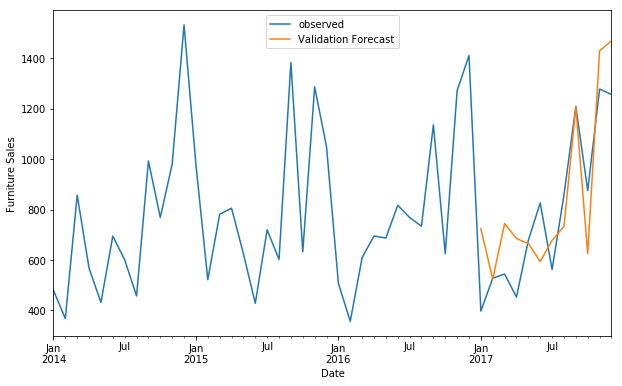

In [42]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'))
plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [44]:
pred.predicted_mean #2017 displayed which was chosen

Order Date
2017-01-01     723.985954
2017-02-01     524.699589
2017-03-01     744.572970
2017-04-01     685.374036
2017-05-01     665.590746
2017-06-01     594.231779
2017-07-01     678.132021
2017-08-01     733.111360
2017-09-01    1206.646716
2017-10-01     625.061853
2017-11-01    1428.980138
2017-12-01    1469.007869
Freq: MS, dtype: float64

In [45]:
Y_pred = pred.predicted_mean
Y_test = y['2017-01-01':]

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Y_test,Y_pred))
print(rms)


185.7723732683706


C:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


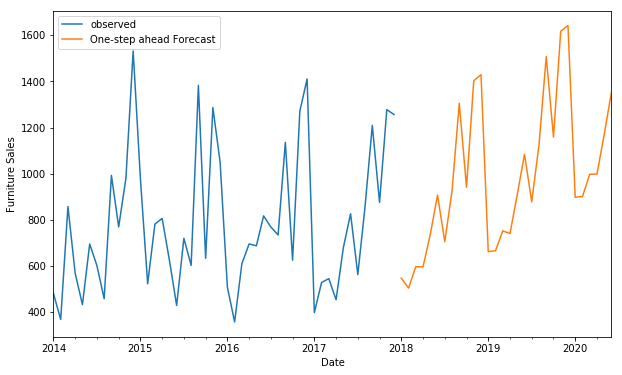

In [46]:
pred_uc = results.get_forecast(steps=30) ##For how many months--->steps=30--2 n half yr
plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='One-step ahead Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [48]:
Y_predictions=pred_uc.predicted_mean ##The predicted value list 2 and half year
Y_predictions

2018-01-01     546.826264
2018-02-01     503.941382
2018-03-01     596.451145
2018-04-01     596.057567
2018-05-01     736.501529
2018-06-01     907.044428
2018-07-01     704.979591
2018-08-01     925.496162
2018-09-01    1305.306844
2018-10-01     941.042307
2018-11-01    1403.343149
2018-12-01    1429.249044
2019-01-01     661.762087
2019-02-01     665.848412
2019-03-01     751.950130
2019-04-01     740.577206
2019-05-01     909.020096
2019-06-01    1084.293237
2019-07-01     877.920890
2019-08-01    1124.347860
2019-09-01    1507.448226
2019-10-01    1159.174801
2019-11-01    1617.819017
2019-12-01    1642.761059
2020-01-01     897.423963
2020-02-01     900.658596
2020-03-01     997.600691
2020-04-01     998.072504
2020-05-01    1169.816818
2020-06-01    1353.489288
Freq: MS, dtype: float64

In [49]:
type(Y_predictions)

pandas.core.series.Series

In [50]:
Y_predictions.to_excel("TimeSeriesOutput.xlsx") ##predicted values stored in the file